<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Sedimentation_Hydraulic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sedimentation Hydraulic

Claudia Buchard, Emma Payne, Kevin Sarmiento

[/Monroe/]: # (Excellent! I think you missed my comments in the Executive summary and constraints sections. You have to open the text to see my comments.  You have made excellent progress. Now turn this into a linear design process if at all possible and select parameters, give ranges where there is flexibility, and make a choice. I'd suggest sharing your sed tank layout with the hydraulics team and ask them to design the channels that deliver water to each sed tank. I'm happy to chat at any time!) 


In [0]:
!pip install aguaclara
!pip install molmass

     |████████████████████████████████| 92kB 4.3MB/s 
     |████████████████████████████████| 163kB 13.8MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=dbf454c56b56e54595f0adcf489d75b3813aefcb060a90ddc3d8a5124864a854
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=c44b69da873a8a0aab63d732937debbd8dea3c0de3ed29907f01d1640b7dd442
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
     |████████████████████████████████| 71kB 3.1MB/s 


In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
import Fairmont as fmt

--2020-05-09 16:37:49--  https://raw.githubusercontent.com/monroews/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3027 (3.0K) [text/plain]
Saving to: ‘Fairmont.py’

Fairmont.py         100%[===================>]   2.96K  --.-KB/s    in 0s      

2020-05-09 16:37:49 (54.5 MB/s) - ‘Fairmont.py’ saved [3027/3027]



# Task Definition

The overall project has three main goals: 

1. To improve the source water quality of the LAAFP and lighten the burden on its filters by building a sedimentation plant upstream, 
2. To eliminate the need to operate the Cottonwood Treatment Plant and 
3. To mitigate the risk associated with arsenic sediment build up in the North Haiwee Reservoir. 

The goal of our team’s project is to design a sedimentation system with a floc blanket that can treat arsenic, TOC, and turbidity to allowable limits while maintaining high efficiency and minimizing space requirements at the treatment plant. This sedimentation system must be able to treat a design flow of 720 CFS and operate efficiently under a variety of turbidity, arsenic, TOC and emerging contaminant conditions. To complete this task we will need to decide on a set of design variables such as plan view area of the sedimentation tank, the geometry of the tank, upflow velocity, number of treatment trains, depth of the floc blanket, the physics of the diffusers in the resuspension system and the height of the floc hopper, as well as constraints for the plate settlers. With these variables decided we must then confirm that the flocculation-sedimentation system can treat the contaminants to allowable limits for various flow and concentration conditions.

# Executive Summary 




The sedimentation tank must be able to process a design flow of 720 CFS to be sent to the LAAFP. The estimated influent water quality of 55 μg/L of arsenic, 4 mg/L of TOC, and 23 NTU of turbidity must be reduced to 10 μg/L, 3mg/L, and 3 NTU in order to meet the client standards. The proposed plan view area for the sedimentation tanks is 250' X 510', making maximum upflow velocity of the system 1.7 mm/s, and the surface loading rate is 0.5 gpm/ft^2. However, these values may be altered to create a better functioning system. The overall sedimentation tanks must be easily accessible for operations and maintenance, so must have adequate platforms and walkways for visibility. 

[/Monroe/]: # (What else could you add as high level summary? How about something about reducing the number of moving parts, improving the performance of the sedimentation tanks with a floc blanket, and ... ?)

[/Monroe/]: # (Define what is meant by surface loading rate and show that number in mm/s as well. Good work doing some design calculations, but why didn't you use python to calculate these values? Goal is to get to the place where you default to python as your calculator of choice!)

[/Monroe/]: # (There is a nice table below with the influent and effluent water quality and so no need to restate that in this paragraph)


# Constraints


Constraint information taken from [Fairmont Sedimentation Plant Scope of Work Document](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf) and [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#floc-blanket-design)
## Relevant regulations

- Permits required found in section X of document

- "The velocity of flocculated water through pipes or conduits to settling basins shall be no less than 0.5 nor greater than 1.5 feet per second. Allowances must be made to minimize turbulence at bends and changes in direction." [10 State Standard](https://www.health.state.mn.us/communities/environment/water/docs/tenstates/waterrev2012.pdf)


* client expectations

>>Fairmont WTP will pre-treat incoming waters from LAA1, LAA2, and SWP-E then send them to the LAAFP for final treatment. 

>>Must eliminate the need for the Cottonwood Treatment Plant, thus preventing arsenic sedimentation in the North Haiwee Reservoir.

>> Must be capable of treating 720 cfs

>>Treatment standards: 

| Contaminant | Design Influent Water Quality  | Fairmont Sedimentation Plant Settled Water Goal | 
|---|---|---|
| Arsenic (μg/L) | 55 | 10 |
| TOC (mg/L)| 4 | 3 |
|Turbidity (NTU) | 23 | 3 |


* Site

>>Water system-owned Fairmont Reservoir property

>>Ave H and 170th street, Lancaster, CA

>>Zone A-2-2, heavy agricultural

>>250’ x 510’ proposed area for sedimentation- may want to break this constraint and use a larger area to use a smaller upflow velocity


* budget

>>Estimated to cost $220 million for the whole project

* process capabilities including process design equations

>>See **Physics** section


* ease of use 

>>Adequate floc hopper height for easy sludge removal

* operation requirements

>>ferric chloride and a cationic polymer in flocculation

>>Follows rapid mix and flocculation

>>Estimated 416 hrs/year of treatment operations


* maintainence requirements

>>Walkways and platforms for easier maintenance and operation, open top for visibility

>>Estimated 288 hrs/year of maintenance and construction hours

* geometry/size requirements

>>Surface loading rate for plate settlers- 0.5 gpm/ft^2, 0.339 mm/s 

>>Surface loading rate for AguaClara: 0.12mm/s

>>60 degree angle for sedimentation tank

>>Sedimentation tank 7m X 1m for AguaClara

>>1/8th-¼ of an inch diffuser width minimum to make sure all particles can pass through

>>Roughly less than 1cm of headless through diffusers

>>1.7 mm/s upflow velocity if we use their plan view area, may want to use 1 mm/s instead to make it comparable to AguaClara sedimentation tanks


# Physics

Our goal is to design a sedimentation tank for the LAAWTP with many of the features of an AguaClara sedimentation tank. This would include a floc blanket and the bottom geometry used in current AguaClara sedimentation tanks. However, due to the large flow rate required for this plant a few features will be modified to be more efficient with space. We are looking to increase the overall size of each sedimentation unit from the AguaClara standard of 7 meters length and 1 meter width. To do this we will design a sedimentation tank with multiple influent manifolds and jet reversers. We will optimize the overall size and number of manifolds and reversers to reduce the overall footprint and material use. 

## Manifolds and diffusers 
One of the important things we need to design are the inlet manifolds and diffusers. The following are relevant equations that we will use for the design. 

Equation 645 in [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-sed-diffuser-jet-velocity) is used to calculate the width of a diffuser based on the design upflow velocity and sedimentation tank dimensions.

$$W_{diffuser} = \frac{V_{floc Blanket} W_{Sed} B_{Diffuser}}{V_{Jet} S_{Diffuser}} $$

The velocity of the jet from the diffuser is determined from the desired head loss. This is important because the greater the head loss at the diffusers the more uniform the flow throughout the entire length of the manifold that feeds the diffusers. 

Headloss from diffusers: 
$$H_{L\space Diffuser}= \frac{V_{Jet}^2}{2g}$$

The following equation is the ratio between port velocity and manifold velocity from [AguaClara textbook](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html?highlight=manifold#equation-manifold-max-v-no-hl-series). This is an important design equation because it ensures that we have as uniform flow as possible. Keeping flow uniform helps prevent undesired circulations in the sedimentation tank which can lead to decreased performance. Additionally, this equation will be important when designing the piping between sedimentation basins. We would want to ensure even distribution between each sedimentation units.

$$\frac{\bar v_{P}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$

Where $\Pi_{Q}$ is the ratio of flow between the first and last oriface in the manifold which we like to keep at around a value of 0.85. 

$$\Pi_{Q} = \frac{Q_{Diffuser \space 1 }}{Q_{Diffuser \space n }}$$



##Plate settlers
Plate settlers are important for verticle flow sedimentation tanks because they allow for greater removal efficiencies compared to vertical flow sedimentation tanks without them. The following equation is for finding length of plate settlers [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html#equation-sedimentation-sed-derivations-8) based on design parameters described below.

$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$
where:
- $S$ is spacing between plates
- $T$ is the thickness of the plates
- $v_{up}$ is the upflow velocity
- $v_c$ is the capture velocity
- $\alpha$ is the angle of the plate settlers

For most of these variables we will be using the same constants that have been used in previous AguaClara plants. Some of these constants are not yet optimized and therefore require further research into how they affect overall plant performance. 

## Particle sedimentation 
To find the terminal velocity of single particles in the sedimentation tank and plate settlers we can use the following equation if the flow regime is laminar. Retrieved from [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-3)

$$ V_t = \frac{gD^2}{18\nu}\frac{\rho_{floc} - \rho_{H_2O}}{\rho_{H_2O}}$$

If flow is turbulent the the terminal velocity equation will be as follows: 
$$v_t = \sqrt{\frac{4}{3}\frac{gD}{C_D}\frac{(\rho_{floc}-\rho_{H_2O})}{\rho_{H_2O}}} $$ 
where $ C_D = \frac{24}{Re}(1+0.150Re^{0.681})+\frac{0.407}{1+ \frac{8710}{Re}} $

### Floc sedimentation 
To find the terminal velocity of flocs which are agrigates of primary particles we use the following equation: 
$$ v_t = \frac{D_0^2g}{18\Phi\nu}\frac{\rho_{floc_0} -\rho_{H_2O}}{\rho_{H_2O}} \left( \frac{D}{D_0} \right) ^{D_{fractal}-1} $$ Retrieved from eq. 405 in the [AguaClara Textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Intro.html#equation-sedimentation-sed-intro-6)

With this we can get an approximation of the smallest size floc that our sedimentation tank can capture. 

##Tank geometry
We will using trigonometry to optimize the bottom geometry of the sedimentation tank. 

## Floc hopper 

The development of a model for sludge accumulation in the floc hopper would be useful. This would help us make decisions about the size and storage capacity that we should plan for in the floc hopper. Additionally, it would be informative for the operators to know how often to purge the floc hopper of sludge. 

# Table listing potential strategies to meet the constraints and treatment objectives


| strategy | advantages  | disadvantages | data needed for decision |
|---|---|---|---|
| Experience + physics | high potential for success | requires knowledge | lots |
| Playing with geometry| Can lead to simple and elegant designs | Requires a lot of imagination | Clear constraints|

# Vendors and contact information file

See this [tab delimited spreadsheet](https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt).

Add rows to the vendor spreadsheet as you find them. The sheet can easily be edited in Excel. Just make sure to save it as a tab delimited sheet. Push your changes to github so the entire class has access to the document.



In [0]:
vendors = pd.read_csv('https://raw.githubusercontent.com/monroews/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN
9,decanter centrifuge (resid) GN Solids Control...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Shared assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

Use this file to hold parameters that are in the SOW or elsewhere that
influence the design of the entire plant. This provides an easy mechanism
for all of us to share the same assumptions. Read the SOW to find sections that relate to your part of the design and enter all pertinent variables into [Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py) and then push those changes to github.

# Major Decisions

Write several paragraphs describing the major decisions that you will need to make in order to create a design and outline a strategy for how you will obtain the necessary information to make those decisions.

[/Monroe/]: # (It would be useful to add some of your reflections in the previous and next paragraphs. Those reflections then guide your next steps.)

# Next Steps and Challenges

Summarize the next steps that you will be taking to move the design forward. Identify any challenges where you may need assistance.

# Design



In [0]:
print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

The average flow to be treated at Fairmont is 206.8 megagallon / day or
The maximum flow to be treated at Fairmont is 465.3 megagallon / day
The average amount of energy used per liter of water is expected to be 118.1 joule / liter or 12.05 meter of potential energy


In choosing the number of sedimentation units and their size it is important to consider a few constrains. If a plant has many smaller sedimentation units then it would be combersome and inefficient to run them all. However, having smaller units allows operators to more precisly control the upflow velocities in the active sedimentation tanks if the total water demand increases or drops. At the other end of the spectrum, if there is a small number of very large sedimentation units then it would be easier for operators to control those few units. However, if there is a need to take one unit offline then the total production decreases at a higher percent of the total flow than with smaller units. Somewhere in between is the "ideal". Based on this notion, we propose the Fairmont Sedimentation Plant use 8 sedimentation units. To find the dimensions of each unit we must define the maximum operating upflow velocity in the sedimentation units. 

The sedimentation tanks that we are designing are vertical upflow sed tanks that will have a fluidized/suspended bed of flocs in what we call a floc blanket. The upward velocity in the sedimentation tanks will impact whether or not a floc blanket can be formed. If the upflow velocity is too high then only the very large flocs will be captured by the plate settlers, no floc blanket will form, and plant performance will drop below desired. AguaClara designs sedimentation tanks with floc blankets and upflow velocities of 1 mm/s. This design has proven to be very effective at producing effluent turbidities below 1 NTU. Given the design max flow rate of this plant and the space constrictions a higher upflow velocity is considered for sedimentation. In 2015, Casey Garland, a Ph.D. student working on floc blanket research carried out experiments to test if higher Energy Dissipation Rates(EDR) at the injection site of the sedimentation tank affected performance. She carried these lab scale tests out at 1.2 mm/s and 1.6 mm/s upflow velocities with great performance. This is promising because it allows us to increase the maximum upflow velocity from 1mm/s to 1.6 mm/s at the Fairmont plant. 

Based on the maximum upflow velocity, maximum design flow rate of 720 cubic feet per second, and the number of units we want (8) we calculated each unit would be 40 meters long by 39.8 meters wide. It would perhaps be alright to round the dimensions out to 40 x 40 meters to make the tanks uniform. The total active sedimentation area required for all 8 units is 12,800 square meters. While this is more area than what the Scope of Work alocated for the sedimentation units, 11,850 square meters, we believe it is still feasible. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_top_view_1.0.JPG" height=400>
</p>
<p align="center">

**Figure 1:** A bird's-eye view of the proposed sedimentation unit with floc hopper channel visible and preliminary dimensions

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/FSP_sed_tank_side_view_1.0.JPG" height=250>
</p>
<p align="center">

**Figure 2:** A side view of the proposed sedimentation unit with floc hopper channel visible and bottom geometry

The following code illustrates how the dimensions of the tank were calculated. It also shows that this preliminary design is feasable in a number of ways. The first thing we wanted to check was the range of flow rates that this plant could operate in. We are designing the plant so that it could meet all the treatment goals at maximum capacity. However, the plant will operate at a range of different flow rates. To predict if this would be an issue we created code that allowed us to easily find the upflow velocities at different flow rates with different number of sedimentation units online. 

We saw that when the plant is operating at its average flow rate of 9.06 cubic meters per second and all sed units are in operation the resulting upflow velocity is 0.71mm/s. There is no evidence suggesting a floc blanket could not form at this slower velocity. However, we were concerned that the reduced flow rate in each tank would make it more difficult for the jet reverser to resuspend settling flocs and as a result begin to fill with sludge. This would be a failure mode and we want to avoid this. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/screenshot_jet_reverser_Garland_2015.JPG" height=250>
</p>
<p align="center"> 

**[(Garland, 2015)](https://www.researchgate.net/publication/287358758_Influence_of_Variable_Inlet_Jet_Velocity_on_Failure_Modes_of_a_Floc_Blanket_in_a_Water_Treatment_Process_Train)**

Casey Garland examined this failure mode in her Ph.D thesis and concluded that in order to prevent flocs from filling up the jet reverses an Energy Dissipation Rate (EDR) above ~1 mW/kg was desired. Additionally, it was also suggested that EDR should not increase above 300 mW/kg as plant performance started to drop after that point. 

$$\varepsilon_{Max} = \Pi_{Jet}\frac{   \bar v_{Jet} ^3}{D_{Jet}}$$

Where $\Pi_{Jet \space Round} = 0.08$ and $\Pi_{Jet \space Plane} = 0.0124$

[AguaClara textbook](https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17)



<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/jet_reverser_Garland_2015.JPG" height=300>
</p>
<p align="center">

We will use this as a design constraint as we move towards the design of the diffusers and jet reversers. 

[/Monroe/]: # (I contend that the failure to resuspend the settled flocs is due to a lack of momentum. Thus I'd take the case that Casey described as failing and find the jet momentum per plan view area of the sedimentation tank. I think this simplifies to a minimum velocity that is required to resuspend the settled flocs. I think this minimum velocity is independent of the sed tank valley width. This minimum velocity IS a function of the floc blanket concentration and thus at the minimum flow for a sed tank the floc blanket will be more concentrated AND the jet velocity will be reduced. Thus the critical design for the jet velocity is at the minimum flow rate.)

In [0]:
# calculations for finding size of sedimentation unit based on the number sed 
# units desired for the entire plant 

max_V_up = 1.6*u.mm/u.s
length_sed_unit = 30*u.m
max_num_sed_units = 16
width_sed_unit = fmt.q_max / (max_V_up * length_sed_unit *max_num_sed_units)
print('Based on limiting parameters the sedimentation tank dimensions are: Length-' +str(length_sed_unit.to(u.m)) +
      ' and width-'+ str(width_sed_unit.to(u.m)) )

area_sed_tanks = (length_sed_unit * width_sed_unit * max_num_sed_units).to(u.m**2)
planned_area_fairmont = (250 * 510 *u.feet**2).to(u.meter**2) # From Scope of Work 
print ('Total active area for hydraulic sed tank design is '+str(area_sed_tanks) + ' while the planned are was '+str(planned_area_fairmont))

Q_max_sed_hydraulic_unit = (1.6*u.mm/u.s * length_sed_unit * width_sed_unit).to(u.megagallon/u.day)
print('Each sedimentation unit can treat up to '+str(Q_max_sed_hydraulic_unit))

# This function calculates the upflow velocity of all the sedimentation basins 
# that are online based on plant total flow rate and the number of sedimentation
# units online at that moment. This is useful because we would want to ensure that 
# we can meet peak and average demand and do it while staying between a min and max 
# upflow velocity. 

def upflow_velo_sed(Q ,num_sed_units, length_sed_unit,width_sed_unit ):
  return (Q / ( num_sed_units *length_sed_unit * width_sed_unit)).to(u.mm/u.s)

num_sed_units = 8 # This value can be changed to see how removing sed units affects upflow velo in the other tanks and the EDR at the jet reverser 
Q_example = fmt.q_ave.to(u.m**3/u.s)
V_up_sed = upflow_velo_sed( Q_example, num_sed_units, length_sed_unit , width_sed_unit)
print ('When the plant flow rate is '+str(Q_example) +' and '+str (num_sed_units)+
       ' out of '+str(max_num_sed_units)+ 
       ' sedimentation tanks are online, then the upflow velocity in those tanks is ' +str(V_up_sed))


# Jet reverser Energy Dissipation Rate
# Perhaps this could be used as a constraint. 
# if EDR gets too low, we can have issues resuspending flocs and an accumulation of 
# sludge can occur at the bottom of the tank 
# Garland et al show good performace at every EDR except 0.25 mW/kg due to the jet reverser 
# becoming filled. The next EDR sucessfully tested was ~1mW/kg. This will be set as the minumum for our design

# function to calculate the EDR from a jet reverser: from Garland 2015 
def EDR_jet(pi_jet , upflow_velo_sed , width_jet, width_section):
  V_jet = width_section * upflow_velo_sed / width_jet  # velocity of the reversed jet  
  return (pi_jet* ((V_jet)**3 / width_jet)).to(u.milliwatt/u.kg)



pi_jet_circular = 0.5
pi_jet_plane = 0.23 # from Garland 2015 
width_jet = 10*u.mm # this is determined by the diameter or width of the diffuser oriface which we can change
width_section = 1.5*u.meter # spaceing between jet reversers is adjustable: traditional AC plants it is 1 meter
EDR_sed_unit = EDR_jet(pi_jet_plane , V_up_sed , width_jet, width_section)

print ('For a sed tank with upflow velo of '+str(V_up_sed)+' sectional width of '+ 
       str(width_section)+' and jet width of '+str(width_jet)+' the EDR is '+str(EDR_sed_unit))


Based on limiting parameters the sedimentation tank dimensions are: Length-30 meter and width-26.55 meter
Total active area for hydraulic sed tank design is 1.274e+04 meter ** 2 while the planned are was 1.185e+04 meter ** 2
Each sedimentation unit can treat up to 29.08 megagallon / day
When the plant flow rate is 9.061 meter ** 3 / second and 8 out of 16 sedimentation tanks are online, then the upflow velocity in those tanks is 1.422 millimeter / second
For a sed tank with upflow velo of 1.422 millimeter / second sectional width of 1.5 meter and jet width of 10 millimeter the EDR is 223.3 milliwatt / kilogram


## Size of Manifolds


As a reality check we will be calculating the diameter of the manifolds that supply water to the sedimentation tanks. Traditional AguaClara plants are about 6 meters long but our proposed sedimentation tanks are 40 meters long. This means that each trunk of a sedimentation manifold must supply a much larger quantitiy of water and therefore will have a larger diameter. If those diameters get too large they can take up a large fraction of the sedimentation unit itself and that could become a failure mode. 

This analysis begins with the following equation which describes the ratio between the velocity leaving the ports, $\bar v_{P}$ , and the velocity in the manifold, $\bar v_{M_{1}}$ . This equation assumes that the head loss due to friction in the pipe is small. 

$$\frac{\bar v_{Jet}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$
From [AguaClara Textbook Equation 643](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-manifold-max-v-no-hl-series)

Where $ \Pi = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. AguaClara typically uses 0.85 in their designs and that has shown great results. 

The velocity of the flow out of the diffuser will be set by the desired upflow velocity in the sedimentation tank($\bar v_{FB}$), the width of the section which the manifold supplies water to ($ W_{Sed  \space section}$), and the width of the diffusers ($W_{Diffuser}$).

<p align="center">
  <img src="https://aguaclara.github.io/Textbook/_images/BvsS_diffuser.png" height=150>
</p>
<p align="center">


$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed  \space section} B_{Diffuser}}{W_{Diffuser} S_{Diffuser}}$$
from [AguaClara Textbook Equation 645](https://aguaclara.github.io/Textbook/Hydraulics/Hydraulics_Intro.html#equation-sed-diffuser-jet-velocity) 

If the thickness of the diffuser wall is small then we can simplify the equation to: 

$$\bar v_{Jet}  = \frac{\bar v_{FB} W_{Sed  \space section} }{W_{Diffuser} }$$
and now solve for the velocity in the manifold as a function of velocity of the jet and the ratio of flows shown above: 

$$v_{Manifold} = \frac {v_{Jet}}{\sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}}$$

[/Monroe/]: # (I edited the previous equation to make it explicitly a function of the flow ratio.)

To find the diameter of the manifold we now relate the required flow rate in the section to the calculated velocity in the manifold. 

$$Q_{Sed\space section} = L_{Sed} W_{sed \space section} V_{up}$$
$$D_{Manifold} = \sqrt{\frac{4 Q_{Sed\space section}}{\pi v_{Manifold}}}$$

The following code outputs a direct comparisson between the FSP design and a traditional AC design. Three main design perameters are compared: manifold diameter, ratio between manifold diameter and the width of the sedimentation portion which that manifold serves, and head loss in the manifold. 

The head loss in the diffusers sets the width of the diffusers
$$v_{Jet} = \sqrt{2gH_L}$$
$$W_{sed \space section}  = \frac{ v_{Jet}W_{diffuser}}{v_{FB}}$$


In [0]:
# last edit made on 5/5/20
def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow):
  return np.sqrt((Ratio_flow**2 + 1)/(2*(1-Ratio_flow**2)))


def volume_valleys(slope_angle, width_valley , length_sed_active, n_valleys, diam_half_pipe):
  """Returns the volume of concrete needed to construct the valley geometry of an
  AguaClara type sedimentation tank
  """
  
  hight_peaks_sed = np.tan(slope_angle)*((width_valley - diam_half_pipe)/2)
  volume_concrete_sed = (hight_peaks_sed /2) * length_sed_active * width_valley *n_valleys
  return volume_concrete_sed.to(u.m**3)


def sch40_pipe(ID):
    """Return the thickness of schedule 40 pipes and returns the ID of the
    closest available sch 40 pipe that is larger than the desired ID. 
    This assumes that the input ID is the smallest ID required. 

    Grabs data from the AguaClara pipe_database file 
    """
    ID = ID.to(u.inch).magnitude
    difference_array = np.array((ac.pipedb['ID_SCH40']) - (ID))
    for i in range(len(ac.pipedb['ID_SCH40'])):
      if difference_array[i]<0:
        difference_array[i]=100

    myindex = (difference_array).argmin()
    closest_OD = (ac.pipedb.iloc[myindex, 3]) * u.mm
    closest_ID = (ac.pipedb.iloc[myindex, 6]) * u.inch
    return closest_ID, closest_OD



def mass_pipe(density_material , ID ,OD , length_pipe):
  """Returns the total mass of a pipe as a functiong of it's 
  thickness, length and density
  """
  volume_pipe = (np.pi / 4) * (OD**2 - ID**2) * length_pipe
  mass_pipe = (density_material * volume_pipe).to(u.kg)
  return mass_pipe

def manifold( v_up , W_diffuser_jet , length_sed , Ratio_flow, HL_diff, pi_jet):
  max_jet_vel = ((2*u.gravity*HL_diff)**(0.5)).to(u.m/u.s) # velo of the jet determined by desired HL 
  width_section_eq = (( max_jet_vel * W_diffuser_jet ) / v_up)
  v_Influent_Manifold = max_jet_vel / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
  Q_section =(length_sed * width_section_eq * v_up)
  ID_min_Influent_Manifold = ac.diam_circle(Q_section/v_Influent_Manifold) # this is the actual minimum diameter
  EDR = (pi_jet* ((max_jet_vel)**3 / W_diffuser_jet)).to(u.milliwatt/u.kg)

  # the following function finds the SCH40 pipe that would satisfy this constrain 
  manifold_info = sch40_pipe(ID_min_Influent_Manifold)
  manifold_ID = manifold_info[0]
  manifold_OD = manifold_info[1]
  return  manifold_ID, Q_section.to(u.L/u.s) , width_section_eq.to(u.inch) , manifold_OD, EDR


Nu = ac.viscosity_kinematic_water(temp)
max_V = 1.6*u.mm/u.s
length_sed_unit_FSP = 20*u.m # optimization variable 
width_diffuser_FSP = 4*u.mm # optimization variable

pi_jet = 0.0124
Ratio_flow = 0.85 # based on flow of first and last port in diffuser 
W_Diffuser = 3 * u.mm # This is the width of traditional AC plant's diffusers 
v_FB = 1 * u.mm/u.s # upflow velo of traditional AC plant 

L_Sed_AC = 6*u.m # Length of traditional sed tank 
Roughness = 0.002*u.mm # PVC pipe roughness
KMinor_manifold = 2 

# set the head loss in the diffusers to a constant and then use that to calculate the velo out of jet 
HL_diff_AC = 1*u.cm
HL_diff_FSP = 1*u.cm

manifold_FSP = manifold( max_V , width_diffuser_FSP, length_sed_unit_FSP  , Ratio_flow, HL_diff_FSP ,pi_jet )
manifold_AC = manifold( v_FB , W_Diffuser , L_Sed_AC  , Ratio_flow, HL_diff_AC, pi_jet)
# based on the flow and the head loss constrain the width of the diffuser is determined
W_sed_AC = manifold_AC[2]
W_sed_FSP = manifold_FSP[2]

## to test feasability I want to check what percent of the sed width is traversed by the manifold 

ratio_manifold_sed_AC = (manifold_AC[0] / W_sed_AC).to(u.dimensionless)
ratio_manifold_sed_FSP = (manifold_FSP[0] / W_sed_FSP).to(u.dimensionless)

# number of diffusers based on standard AC diffuser width design 
diffuser_width = 5*u.cm # based on aproximate AC design 
n_diffusers_AC = (L_Sed_AC / diffuser_width).to(u.dimensionless)
n_diffusers_FSP = ( length_sed_unit_FSP/ diffuser_width).to(u.dimensionless)

# Head loss in manifold function from AC Core 

head_loss_manifold_AC_2 = ac.headloss_manifold(manifold_AC[1], manifold_AC[0], L_Sed_AC , KMinor_manifold, Nu, Roughness, n_diffusers_AC )
head_loss_manifold_FSP_2 = ac.headloss_manifold(manifold_FSP[1], manifold_FSP[0], length_sed_unit_FSP, KMinor_manifold, Nu, Roughness, n_diffusers_FSP )


print('Diameter manifold in AC plant is '+str(manifold_AC[0])+', flow rate of '+str(manifold_AC[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_AC)+' and headloss of '+str(head_loss_manifold_AC_2.to(u.cm)) )
print('Diameter manifold in FSP plant is '+str(manifold_FSP[0])+', flow rate of '+str(manifold_FSP[1])+
      ', manifold to sed tank width ratio '+str(ratio_manifold_sed_FSP)+' and headloss of '+str(head_loss_manifold_FSP_2.to(u.cm)) )

# What amount of head loss in the manifold is acceptable? Should we try to keep the head loss as low as in the AC designs? 
# if we do that then we can set the head loss in diam_manifold_FSP equal to head_loss_manifold_AC_2
# more head loss in the pipe could probably help flow distribution and counter the pressure recovery 

Diameter manifold in AC plant is 7.981 inch, flow rate of 7.972 liter / second, manifold to sed tank width ratio 0.1526 dimensionless and headloss of 0.2765 centimeter
Diameter manifold in FSP plant is 17.25 inch, flow rate of 35.43 liter / second, manifold to sed tank width ratio 0.3957 dimensionless and headloss of 0.2669 centimeter


The code above only looks at one specific sedimentation tank with a specified length, width, and diffuser head loss. 

In the analysis below the independent variables are the width of the valleys, the length of the sedimentation tank, and the head loss at the diffuser. The code outputs six graphs with the following information:

1. Diameter of the manifold
2. Ratio between manifold diameter and the width of the sedimentation portion which that manifold serves 
3. Head loss in the manifold 
4. Energy Dissipation Rate leaving the diffusers
5. Total mass of PVC required 
6. Total volume of filler material required for valleys 
7. Total cost of PVC and concrete 

 
A constraint has been added to remove any configuration that results in a jet diffuser width less than 3mm. Anythings smaller than 3 mm could pose a risk to clogging. This constraint can be revised if we get feedback that it should be bigger or smaller. 

The cost analysis reflected in this code makes a few key assumptions. The first is that the material used to make the valleys is concrete. From the scope of work we determined that 1 cubic yard of concrete was worth $300 USD. Volume of concrete was 

 Additionally, we assumed that the piping used was PVC schedule 40 pipes. From this we found the required inner diameter based on the constrains and the matching outer diameter. The volume of PVC used was determined by the following relation: 

$$\rlap{-}V_{PVC} = \frac{\pi (D_{Outter}^2 -D_{Inner}^2)}{4} L_{Sed} n_{Manifolds}$$
 

In [0]:
# in the Scope of Work page 43 they estimate that 1 feet of 8" ND PVC pipe will cost 14 USD 
# We are assuming the pipe used is schedule 40 and based on the ID and OD of 8" ND schedule 40 finding the mass
# of the pipe and then finding the cost per kg of this PVC pipe. 
# This is used in the following calculations to estimate the total cost of PVC 
density_PVC=	1.38*(u.g/u.cm**3)
mass_8_inch_PCV_pipe = (mass_pipe(density_PVC ,7.981*u.inch ,8.625*u.inch, 1*u.feet)).to(u.pound)
price_per_pound_PVC =  (14*u.USD) / mass_8_inch_PCV_pipe 
print('Estimated price of PVC is ',price_per_pound_PVC)

Estimated price of PVC is  2.786 dollar / pound


In [0]:
np.arange(0.5,2.25,0.25)

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

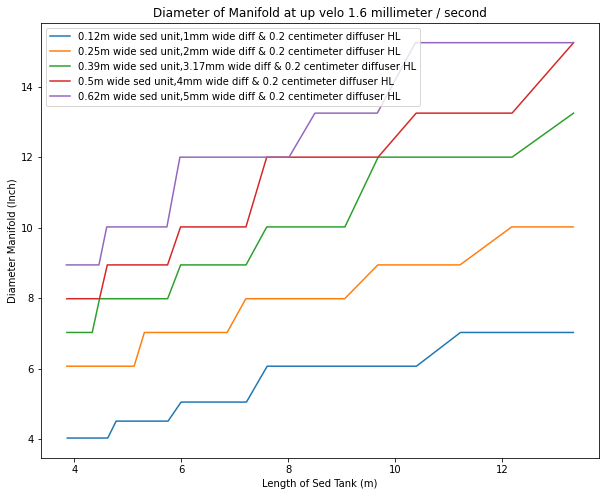

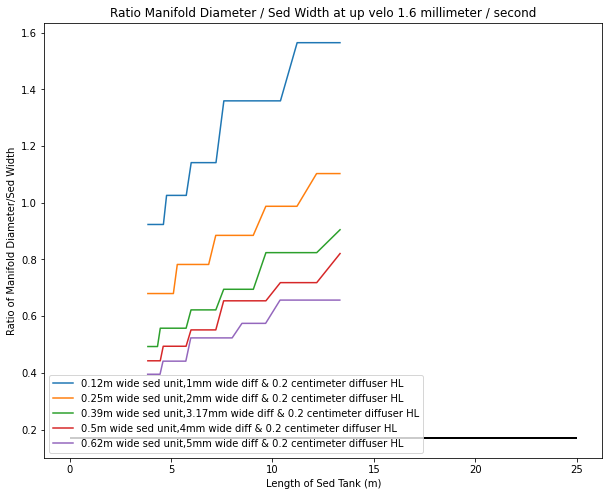

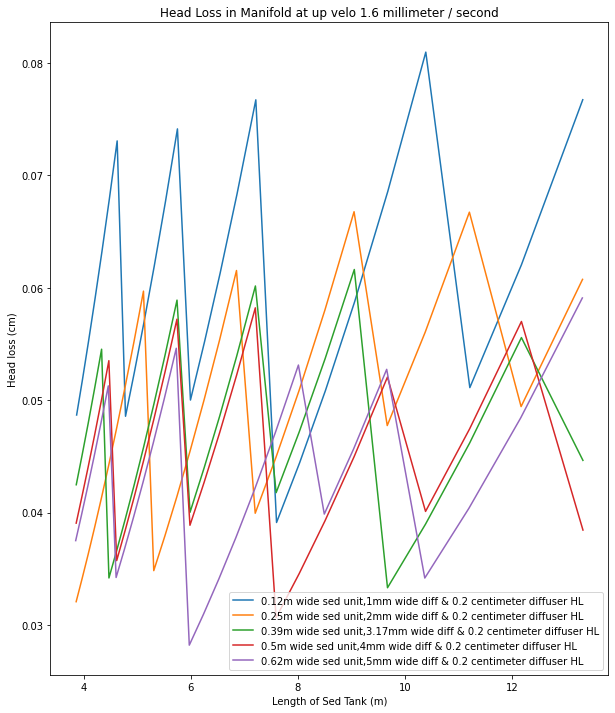

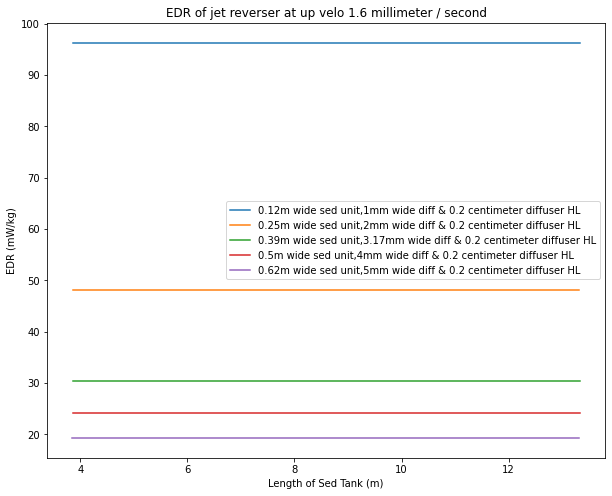

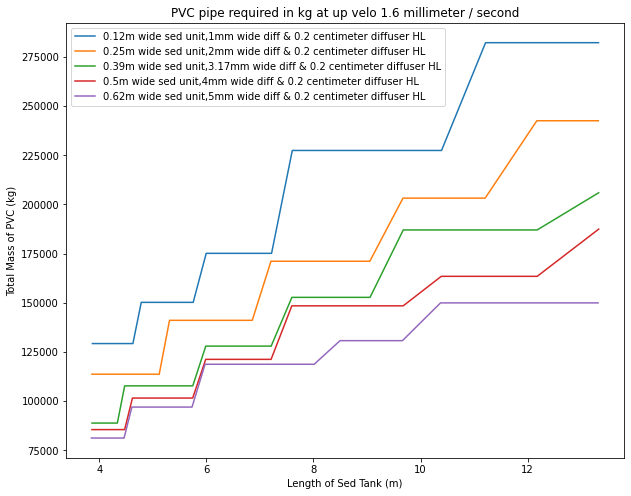

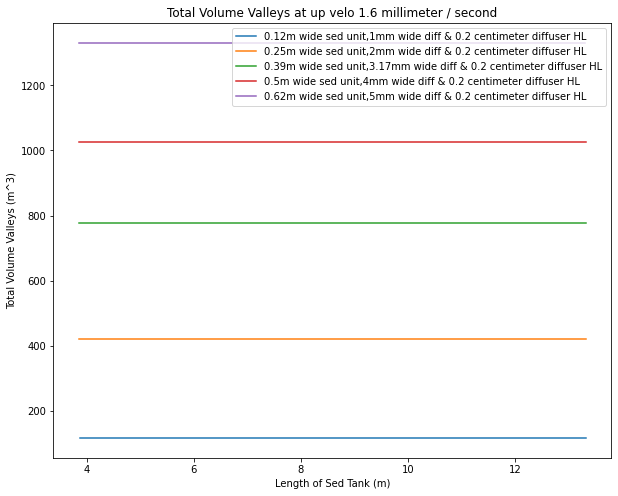

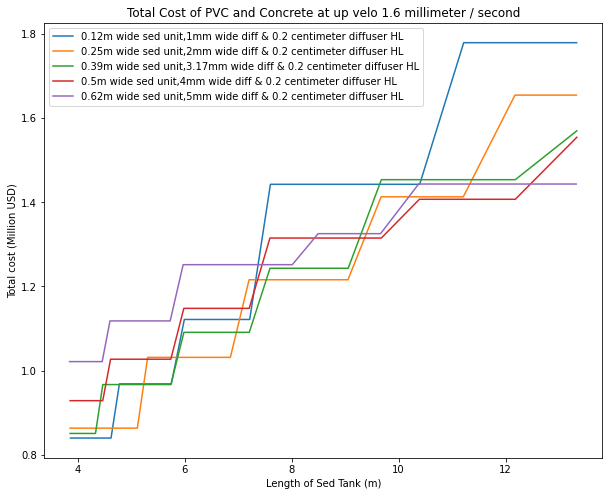

In [0]:
# last edit 5/5/20
#### Plotting different manifold characteristics for manifolds with AguaClara like diffusers
#calculate diameter, flow rate and head loss for a range of manifold lengths, widths, and diffuser head losses


def manifold_parameter_graph( V_up_FB ,Ratio_flow , HL_diffuser ,KMinor_manifold , Nu, Roughness, Q_plant):
  for width_diffuser in [1*u.mm , 2*u.mm ,3.175*u.mm , 4*u.mm , 5*u.mm]:
    # np.arange(3,9,3)*u.mm
    # pi jet in Casey Garland's 2015 paper is 0.23 for a plane jet???
    pi_jet = 0.0124 # https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17 
    slope_angle = 60*u.degree
    density_PVC=	1.38*(u.g/u.cm**3)
    cost_concrete = 300*(u.USD/u.yard**3) # Scope of work page 43 
    price_per_pound_PVC = 2.786*u.USD/u.pound
    diam_half_pipe = 3*u.inch
    diffuser_length = 5*u.cm
    D =[] 
    lengths=[]
    headloss=[]
    Q=[]
    EDR = []
    manifold_sed_ratio = []
    volume_bottom_geometry = [] # in m^3
    total_mass_PVC = []
    cost_PVC_and_concrete = []

    max_jet_vel = ((2*u.gravity*HL_diffuser)**(0.5)).to(u.m/u.s) # velo of the jet determined by desired HL 
    w_sed_unit = (( max_jet_vel * width_diffuser ) / V_up_FB).to(u.m)
   
    for n_manifolds in reversed(np.arange(round(425/w_sed_unit.magnitude),round(1500/w_sed_unit.magnitude),round(40/w_sed_unit.magnitude))):
      # I opt for looping through different number of manifolds and using that to calculate the lengths of the manifolds using the conservation of mass 
      # This allows to have the number of manifolds to later use to make cost estimates 
      length_sed = (Q_plant / (V_up_FB * w_sed_unit *n_manifolds)).to(u.m)
      v_Influent_Manifold = max_jet_vel / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
      Q_section =(length_sed * w_sed_unit * V_up_FB).to(u.l/u.s)
      ID_min_Influent_Manifold = ac.diam_circle(Q_section/v_Influent_Manifold) # this is the actual minimum diameter
      manifold_info = sch40_pipe(ID_min_Influent_Manifold)
      manifold_ID = (manifold_info[0]).to(u.inch)
      manifold_OD = (manifold_info[1]).to(u.inch)
      energy_diss_rate = (pi_jet* ((max_jet_vel)**3 / width_diffuser)).to(u.milliwatt/u.kg)
      n_diffusers = round(( length_sed/ diffuser_length).to(u.dimensionless))
      hl = ((ac.headloss_manifold(Q_section, manifold_ID, length_sed, KMinor_manifold, Nu, Roughness, n_diffusers )).to(u.cm)) # hl in cm
      width_sed_active = w_sed_unit * n_manifolds
      volume_bottom = (volume_valleys(slope_angle, w_sed_unit , length_sed , n_manifolds, diam_half_pipe)).to(u.m**3)
      total_length_pipe = length_sed * n_manifolds
      mass_PVC = (mass_pipe(density_PVC , manifold_ID, manifold_OD , total_length_pipe)).to(u.kg)
      material_cost = ((volume_bottom*cost_concrete) + (mass_PVC *price_per_pound_PVC)).to(u.megaUSD)
      
      lengths.append(length_sed.magnitude) # (in meters)
      D.append(manifold_ID.magnitude) # (in inches)
      Q.append(Q_section.magnitude) # (in L/s)
      manifold_sed_ratio.append((manifold_OD/w_sed_unit).to(u.dimensionless))
      headloss.append(hl.magnitude) # in cm
      EDR.append(energy_diss_rate.magnitude) # in mW/kg
      volume_bottom_geometry.append(volume_bottom.magnitude) # in m^3
      total_mass_PVC.append(mass_PVC.magnitude) # in kg
      cost_PVC_and_concrete.append(material_cost.magnitude) # in Million USD

    plt.figure(1,[10,8])
    string = str(round(w_sed_unit.magnitude,2))+'m wide sed unit,' +str(round(width_diffuser.magnitude,2))+'mm wide diff & '+str(HL_diffuser)+' diffuser HL'
    plt.plot(lengths,D,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Diameter Manifold (Inch)')
    plt.title('Diameter of Manifold at up velo '+str(V_up_FB))
    plt.legend()
      
    plt.figure(2,[10,8])
    plt.plot(lengths,manifold_sed_ratio,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Ratio of Manifold Diameter/Sed Width')
    plt.hlines(0.17,0,25 , 'black',)
    plt.title('Ratio Manifold Diameter / Sed Width at up velo '+str(V_up_FB))
    plt.legend()

    plt.figure(3,[10,12])
    plt.plot(lengths,headloss,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Head loss (cm)')
    plt.title('Head Loss in Manifold at up velo '+str(V_up_FB))
    plt.legend()

    plt.figure(4,[10,8])
    plt.plot(lengths,EDR,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('EDR (mW/kg)')
    plt.title('EDR of jet reverser at up velo '+str(V_up_FB))
    plt.legend()

    plt.figure(5,[10,8])
    plt.plot(lengths,total_mass_PVC,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Total Mass of PVC (kg)')
    plt.title('PVC pipe required in kg at up velo '+str(V_up_FB))
    plt.legend()

    plt.figure(6,[10,8])
    plt.plot(lengths,volume_bottom_geometry,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Total Volume Valleys (m^3)')
    plt.title('Total Volume Valleys at up velo '+str(V_up_FB))
    plt.legend()

    plt.figure(7,[10,8])
    plt.plot(lengths,cost_PVC_and_concrete,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Total cost (Million USD)')
    plt.title('Total Cost of PVC and Concrete at up velo '+str(V_up_FB))
    plt.legend()


# Running the function for various head loss values. The values can be changed 
for i in  [0.2*u.cm ]:
  #np.linspace(1 ,3,3)*u.cm
  manifold_parameter_graph( 1.6*u.mm/u.s ,Ratio_flow , i, KMinor_manifold , Nu, Roughness , fmt.q_ave)

### Observations of the graphs
If you take a look at the first group of graphs, the one that looks at the diameter of the manifold, we actually see that you can increase the width of the valley without increasing the diameter significantly. In fact, in some scenarios a wider valley led to a smaller ratio between diameter of the pipe and tank width. This would translate to less pipe used in the entire system. However, a wider valley would translate to higher peak which would require more concrete. We have not factored in the added concrete needed if we increase the width of the valleys. 

The constraint that we put on the graph to ensure the width of the diffuser was not smaller than 3mm also had important implications. We can see that as the desired head loss in the diffuser increases, the valley width needed to ensure the diffuser width is larger than the constrain also increases. 1 cm head loss at the diffuser can be obtain with valley widths larger than 1 m. However, to obtain a head loss of 3cm the valleys have to be larger than 1.5 m wide and for 5cm head loss the valley needs to be nearly 2m wide. 

The graph showing the ratio Manifold diameter to sed width is helpful for putting the diameters of the manifold into context. The horizontal black line is the manifold diameter:sed width ratio in typical AC plants. A smaller ratio translates to less total pipe length used in all the sedimentation basins.

The last two graphs are an attempt to weigh the pros and cons of changing the width of the valleys. From a start we knew that increasing valley width would require more concrete. This is assuming that the bottom of this tank is made out of concrete. There is an arguement to make that we could suggest making the bottom geometry out of other materials. 







#Reflections (Monroe's)

We need a methodical scheme to select these parameters.

* velocity of jet (same as picking head loss of jet)
* width of valley
* length of manifold

Increased jet velocity improves assurance that resuspension of the floc blanket won't fail even at low flow rates. As long as we don't go to the super high velocities that Casey Garland tested we should be fine. Don't want to use too much energy. Given that we only have 60 cm total at Fairmont I would select a jet headloss between 1 cm and 5 cm. Make sure that velocity range is okay even when the sed tanks are operating at lower flow rates. If possible choose 5 cm.

I suspect that going to a wider valley area isn't optimal because it requires more concrete for the valleys and it requires using larger PVC pipes. The cost of PVC pipe goes up very fast as the pipe diameter increases. One option is to keep the valley width at 1 m for now.

[/Kevin/]: # (If you take a look at the first group of graphs, the one that looks at the diameter of the manifold, we actually see that you can increase the width of the valley without increasing the diameter significantly. In fact, in some scenarios a wider valley led to a smaller ratio between diameter of the pipe and tank width. This would translate to less pipe used in the entire system. However, you are right about having to use more concrete. We have not factored in the added concrete needed if we increase the width. )

Maximum Length of manifold then is set by the maximum practical diameter. I'd suggest limiting the pipe diameter to either 12 (my preference) or 16 inches. 

These pipes will need supports to hold them up for these long spans. And the pipes will come in sections and the joints will have to be designed to accommodate the continuous differs.

## Alternative diffuser approach 

#### Reasoning for doing alternative 

- Previous analysis shows that wider valleys requires much more filler material such as concrete. 
- With the previous diffuser design it was not possible to obtain higher diffuser head losses without increasing the width of the valleys
- Total costs were high 

This new approach will use small holes cut into a PVC slab to act as diffusers. This allows for higher head loss in the diffusers because the total area of the diffusers is lower which increases the jet velocity. This also means that the velocity in the manifold can increase as well which in turn means that a smaller diameter manifold can be used. This could help significantly reduce material cost. 



This analysis begins at the scale of a single diffuser with conservation of mass. 
$$Q_{diffuser} = \frac{Q_{Manifold}}{n_{Diffusers}}$$

$$Q_{diffuser} = v_{Jet \space Diffuser}\frac{\pi D_{Diffuser}^2}{4}$$

Like in the previous analysis we will be setting the head loss, $h_L$, in the diffuser to find of the velocity of the jet leaving the diffuser. 

$$ v_{Jet \space Diffuser} = \sqrt{2gh_L}$$

We can now solve for $Q_{Manifold}$ in two forms. The first by combining the above equations and second with a statement of conservation of mass. 

$$ Q_{Manifold} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2 n_{Diffusers}}{4}$$

$$ Q_{Manifold} = L_{Sed}W_{Valley}v_{FB}$$

In our previous manifold design our independent variables for finding the diameter of the manifold were the width of the valleys, the length of the sed tanks, and the desired head loss of the diffusers. In this analysis we will use the diameter of the diffusers, length of the sed tanks, and desired head loss at the diffusers as the independent variables. We believe the constraints on the diffuser diameters are clearer and actually help us find a better design. 

If we combine the two expressions for $Q_{Manifold}$ and solve for $W_{Valley}$ we get the following expression: 
$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2 n_{Diffusers}}{4L_{Sed}v_{FB}}$$

The next step is to find $n_{Diffusers}$ from the geometry of the diffusers. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_manifold_parallel_view.JPG" height=350>
</p>
<p align="center">

**Figure 3:** Expansion of the flow leaving the diffusers and converging before reaching the half pipe. 

From the schematic shown above we can estimate that the number of diffusers is equal to the length of the manifold divided evenly by the length of the spacing summed with the diameter of the diffuser. 

$$ n_{Diffusers} = \frac{L_{Sed}}{D_{Diffuser} + L_{Spacing}}$$

The space between diffusers,$ L_{Spacing}$, is set by the rate at which the flow leaving the diffuser expands. We need to ensure that the flow from one diffuser expands and meets flow of the diffuser next to it before reaching the half pipe below. This is important because we need to ensure that there are no "dead zones" where sludge can build up in the half pipe. The figure below gives a better visual representation of the half-pipe, which's purpose is to redirect the downward flow to an upward flow to resuspend settling flocs. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_diffuser_expansion_2.JPG" height=450>
</p>
<p align="center">

**Figure 4:** Expansion of the flow leaving diffusers should not be wider than half of the diameter of the half pipe. 

To find $L_{Spacing}$ we will use the following idea about flow expansions. In order for the flow to expand one unit in width it needs to flow 10 units in length, resulting in the following ratio, $\frac{L}{W}=10$. In our case the flow needs to expand by $L_{Spacing}$ before it travels $H_{Jet}$, resulting in:

$$\frac{H_{Jet}}{L_{Spacing}} = 10$$

We can now solve for $n_{Diffusers}$ as a function of our new parameters:

$$n_{Diffusers} = \frac{L_{Sed}}{D_{Diffuser} +  \frac{H_{Jet}}{10}}$$


And now we can solve for $W_{Valley}$ by plugging in our expression for $n_{Diffusers}$:


$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2}{4v_{FB} (D_{Diffuser} +\frac{H_{Jet}}{10})}$$


We now have enough information to solve for the diameter of the manifold. The first step is to relate the velocity of the jet leaving the diffusers, $v_{Jet}$, to the velocity of the flow in the manifold,$v_{Manifold}$.


$$\frac{\bar v_{Jet}}{\bar v_{M_1}} = \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 - \Pi_{Q}^2)}}$$


Where $\Pi = \frac{Q_{port \space 1}}{Q_{port \space n}} $ which describes the ratio of flow between the first and last ports on the manifold. AguaClara typically uses 0.85 in their designs and that has shown great results. Recall that $\bar v_{Jet} = \sqrt{2gh_L}$. We can now express the diameter of the manifold based on the maximum velocity we can have in the manifold to keep flow uniform. 


$$Q_{Manifold} = \frac{\pi D_{Manifold}^2}{4} v_{Manifold} $$


Solving this equation for $D_{Manifold}$ where $Q_{Manifold} = L_{Sed} W_{Valley}v_{FB}$ we get: 


$$D_{Manifold}=\sqrt{\frac{4 L_{sed} v_{FB} W_{Valley} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}} }{\pi \sqrt{2gh_L}}}$$

We can simplify further by substituting $W_{Valley}$: 

$$D_{Manifold} = \sqrt{\frac{D_{Diffuser}^2 L_{sed} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Diffuser} +  \frac{H_{Jet}}{10}} } $$


The next step is to define $H_{Jet}$. We can do this in two ways, the first we can vary $H_{Jet}$ and use it as another independent variable in our design. The second way to approach this is to relate it as a function of known constants and independent variables. Since we are already dealing with three independent variables we are going to relate it to those variables to not complicate our analysis more. From figure 4 we can see that the flow can expand up to half the diameter of the half pipe. We can express this expansion the same way we did with the previous one by relating the ratio of horizontal expansion, from the diameter of the diffuser to half the diameter of the half pipe, to verticle hight, $\frac{L}{W}=10$. This results in the following:

$$ \frac{H_{Jet}}{ \frac{D_{Half \space Pipe}}{2} - D_{Diffuser}} = 10$$

If we solve for $H_{Jet}$ explicitly we get get the following: 
$$ H_{Jet} =10 ( \frac{D_{Half \space Pipe}}{2} - D_{Diffuser})$$

This expression serves as $H_{Jet\space Max}$. We do not want the jet to expand wider than about half of the diameter of the half pipe. We should also set a $H_{Jet\space Min}$ based on possible failure modes. Figure 4 shows us that making $H_{Jet}$ smaller would cause flocs sliding down from the right side of the manifold to be blocked from entering the half pipe. This would cause a build up of sludge. We propose $H_{Jet \space Min}$ to be 1 inch to allow unobstructed flow of flocs. 

This gives us the following physical constraint: 

$$1 \space inch \leqslant H_{Jet} \leqslant 10 ( \frac{D_{Half \space Pipe}}{2} - D_{Diffuser})$$

Since we plan on setting $H_{Jet}$ equal to the max, we just have to check that $H_{Jet}$ is greater than 1 inch.

We can now substitute $H_{Jet}$ in the equations for both $D_{Manifold}$ and $W_{Valley}$ to simplify them to their final form:


$$D_{Manifold} = \sqrt{ \frac{2D_{Diffuser}^2 L_{sed} \sqrt{\frac{\Pi_{Q}^2 + 1}{2(1 -\Pi_{Q}^2)}}} {D_{Half\space Pipe}} }$$


$$ W_{Valley} = \frac{\sqrt{2gh_L}\pi D_{Diffuser}^2}{2v_{FB} D_{Half\space Pipe} }$$

These will be the equations we use in the following code to decide on the geometry of the sed tanks. 

Now we want to include some constrains on our approach to ensure that the results we get make physical sense. The first one is to figure out if at the hight of the manifold there will be sufficient space for water to flow around it. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_manifold_to_sed_width_ratio.JPG" height=250>
</p>
<p align="center">

**Figure 5.** Schematic of the manifold inside a sedimentation tank with sloped valley walls surrounding it. 

From figure 5 we can see that we need to find $H_{Manifold}$. 

$$H_{Manifold} = H_{Jet} + H_{Diffuser} + \frac{D_{Manifold}}{2}$$

The hieght of the diffuser,$H_{Diffuser}$, is important for ensuring that by the time the jet of water leaves the diffuser it has only a downward velocity vector and not a horizontal velocity. Failure to do so would cause undesired currents in the settling basin and compromise the efficacy of the floc blanket. Like the previous flow expansions we will say that $\frac{L}{W} = 10$. In relation to the diameter of the diffuser and length of the diffuser we get the following: 

$$H_{Diffuser} = 10 D_{Diffuser}$$

Now we have a full expression for the hight of the manifold: 

$$H_{Manifold} = 10 ( \frac{D_{Half \space Pipe}}{2} - D_{Diffuser}) + 10 D_{Diffuser} + \frac{D_{Manifold}}{2}$$

Which simplifies to: 

$$H_{Manifold} = 5D_{Half \space Pipe} + \frac{D_{Manifold}}{2}$$



<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/new_manifold_width_at_height_H.JPG" height=350>
</p>
<p align="center">

**Figure 6.** Drawing showing the available width within the valley of a sedimentation tank.

To find the available width in the valley, from Figure 6, we can see that we can relate length $L$ to $H_{Manifold}$. 


$$L = \frac{H_{Manifold}}{Tan(\theta)}$$

Total width now is equal to $2L$ plus the diameter of the half pipe. 

$$ W_{Width \space at \space H} = 2 \frac{H_{Manifold}}{Tan(\theta)} + D_{Half \space Pipe}$$

The following code will first check if $H_{Manifold}$ is higher than the peak of the valleys. If it is then it will calculate the ratio of $\frac{D_{Manifold}}{W_{Valley}}$. If $H_{Manifold}$ is less than the peak of the valley then it looks for the ratio $\frac{D_{Manifold}}{W_{Width \space at \space H}}$

## Cost analysis 

The cost analysis is based on the total volume of concrete required to make the valleys shown in figure 7 and the total mass of PVC required for the specified diameter pipes for the manifolds, figure 8. 

### Cost Concrete in Valleys

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/bottom_geometry_sed_hydraulic.JPG" height=300>
</p>
<p align="center">

**Figure 7.** Concrete structure shown in the gray along with manifolds and half pipes. Not shown to scale. 

From figure 8 we can see that the length denoted $L$ is equal to $\frac{W_{Valley} - D_{Half \space Pipe}}{2}$. This means that the base of the triangle is equivilant to: 

 $$Base_{triangle} = W_{Valley} - D_{Half \space Pipe}$$ 
 
  The height of the valley is: 

$$H_{Valley} = Tan(\theta)\frac{W_{Valley} - D_{Half \space Pipe}}{2}$$

Volume of concrete required to fill in the valley is now equal to: 

$$ \rlap{-}V_{Concrete} = \frac{H_{Valley} Base_{triangle} L_{Sed \space Tank}}{2} $$

$$ \rlap{-}V_{Concrete \space Total} = \frac{Tan(\theta) L_{Sed \space Tank} (W_{Valley} - D_{Half \space Pipe})^2}{4} n_{Valleys}$$

### Cost of PVC from Manifolds

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/diagram_pipe_manifold.JPG" height=200>
</p>
<p align="center">

**Figure 9.** Thickness of schedule 40 PVC pipe used for manifold design depends on the design ID

The cost of PVC was estimated by comparing the total mass of PVC required for each design. This was done by assuming that the pipes used for the manifolds would be Schedule 40 pipes. The minimum diameter pipe would be calculated and then checked against a table of commonly available Schedule 40 pipes. The closest pipe diamter larger than the required minimum was selected and its inner and outer diameter recorded. The volume of PVC was calculated as follows: 

$$\rlap{-}V_{PVC \space Total} = \frac{\pi }{4} (D_{outer}^2 - D_{Inner}^2) L_{Manifold} n_{Manifolds}$$




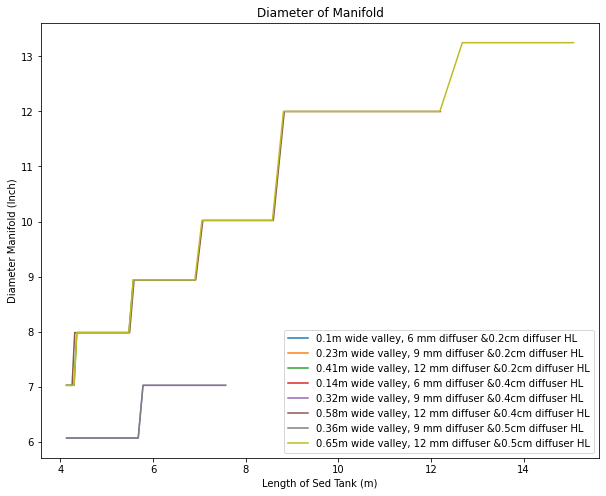

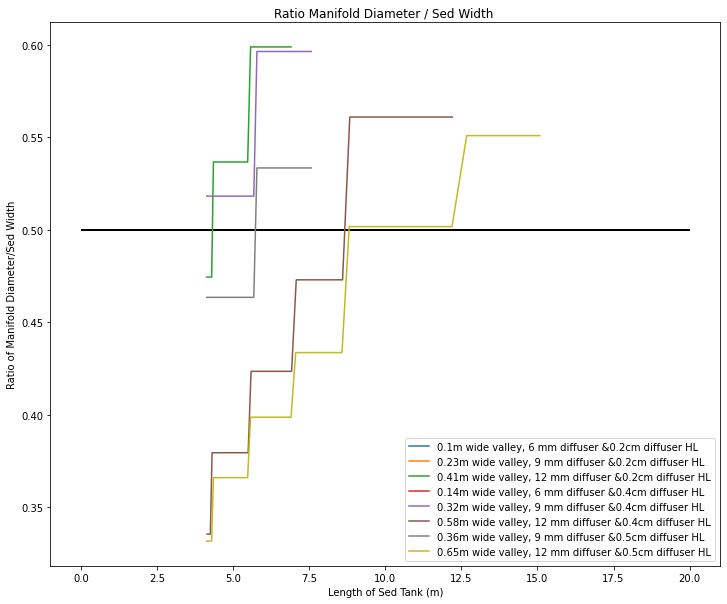

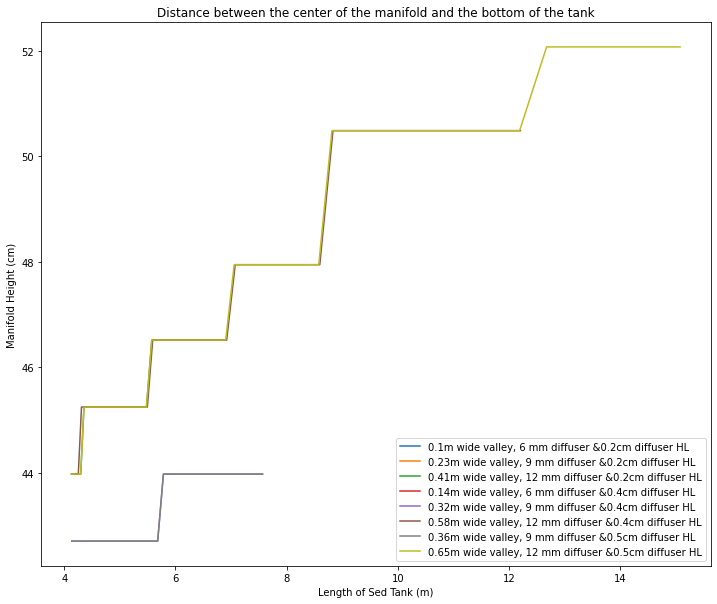

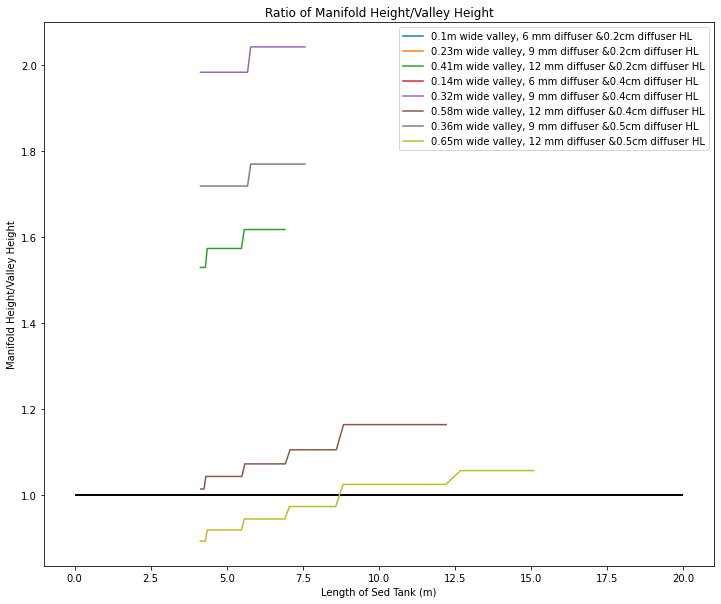

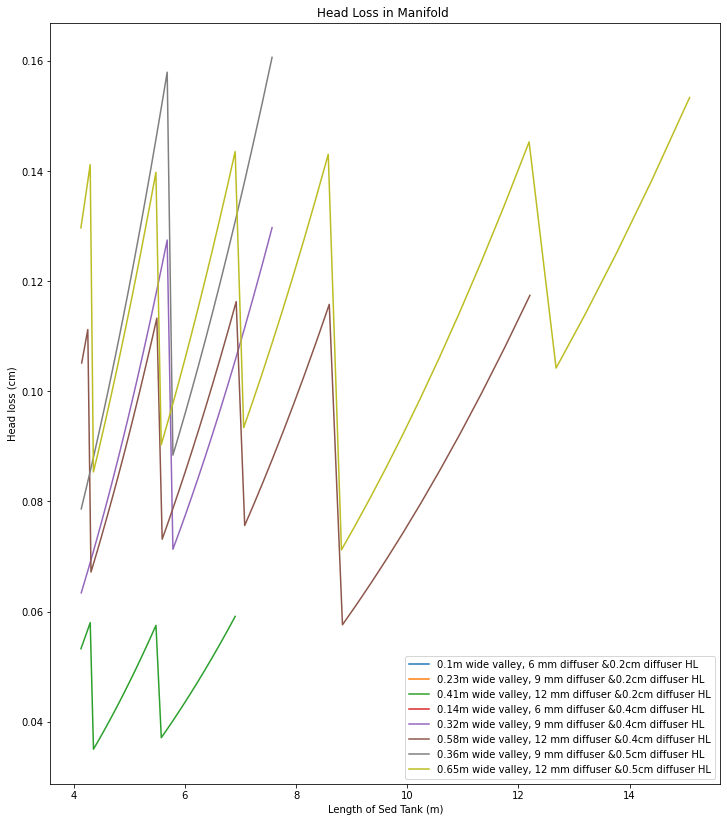

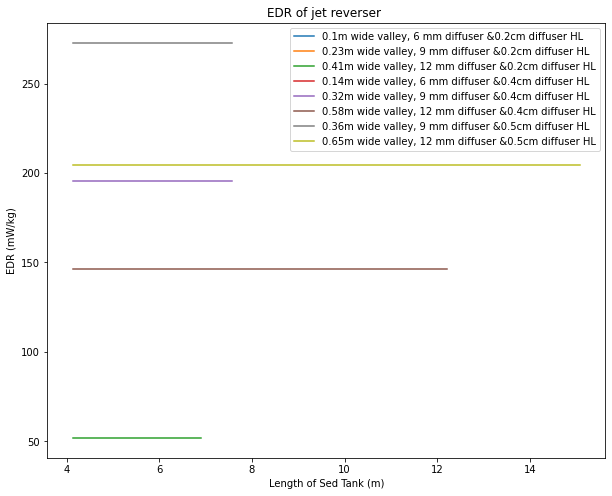

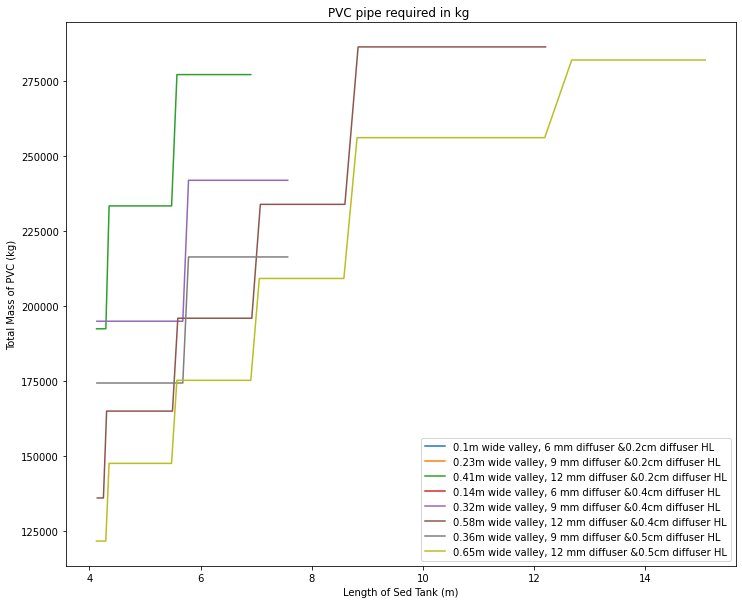

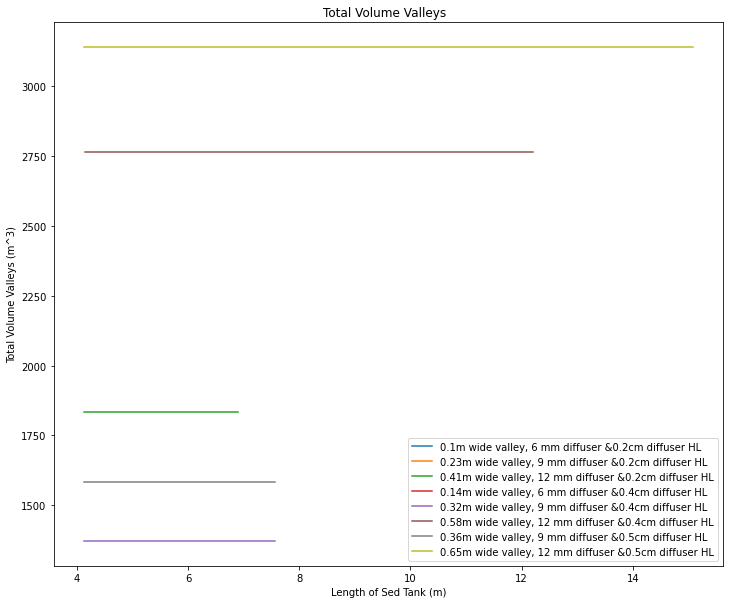

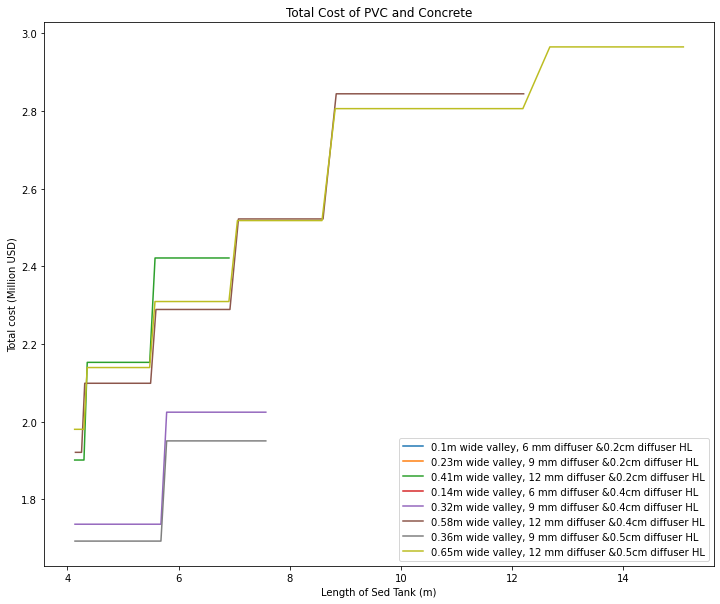

In [0]:
# 5/5/20 
# code for new diffuser design 


def new_manifold_parameter_graph( V_up_FB ,Ratio_flow , HL_diffuser ,KMinor_manifold , Nu, Roughness, Q_plant):
  for diam_diffuser in [6*u.mm , 9*u.mm , 12*u.mm]:
    # np.linspace(3, 20 ,3, endpoint=True)*u.mm
    pi_jet_round = 0.08 # https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html#id17 
    slope_angle = 60*u.degree
    density_PVC=	1.38*(u.g/u.cm**3)
    cost_concrete = 300*(u.USD/u.yard**3) # Scope of work page 43 
    price_per_pound_PVC = 2.786*u.USD/u.pound # derived from Scope of work page 43
    safety_factor = 0.9 # We can make the height of the manifold shorter by decreasing this term. This would mean that we would allow less expansion to occur before reaching half pipe
    diam_half_pipe = 3*u.inch 
    max_desired_width_expansion = diam_half_pipe * safety_factor
    H_jet = (10*( ((max_desired_width_expansion) / 2) - diam_diffuser)).to(u.inch)
    w_sed_valley = (((2*u.gravity*HL_diffuser)**(1/2) * np.pi * diam_diffuser**2) / ( 2* V_up_FB * max_desired_width_expansion)).to(u.m)
    D =[] # in inches
    lengths=[] # in meters
    headloss=[] # in cm
    EDR = [] #in mW/kg
    manifold_sed_ratio = []
    manifold_height_to_valley_height_ratio_1 =[]
    manifold_height_1 = [] # in cm
    volume_bottom_geometry = [] # in m^3
    total_mass_PVC = [] # in kg
    cost_PVC_and_concrete = [] # in USD
    energy_diss_rate = ((pi_jet_round * ((2*u.gravity* HL_diffuser)**(0.5))**3 ) / diam_diffuser).to(u.milliwatt/u.kg)
    H_jet_min = 1*u.inch
    if H_jet > H_jet_min and energy_diss_rate <= 300*u.milliwatt/u.kg:  # filters out undesired options based on our constraints 
      for n_manifolds in reversed(np.arange(round(725/w_sed_valley.magnitude),round(3100/w_sed_valley.magnitude),round(40/w_sed_valley.magnitude))):
        # I opt for looping through different number of manifolds and using that to calculate the lengths of the manifolds using the conservation of mass 
        # This allows to have the number of manifolds to later use to make cost estimates 
        length_sed = (Q_plant / (V_up_FB * w_sed_valley *n_manifolds)).to(u.m) # 
        Pi_manifold = Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_flow)
        manifold_ID_min = (((2 * diam_diffuser**2 * length_sed * Pi_manifold) / ( max_desired_width_expansion ))**(0.5)).to(u.inch)
        manifold_d = sch40_pipe(manifold_ID_min)
        manifold_ID = (manifold_d[0]).to(u.inch)
        manifold_OD = (manifold_d[1]).to(u.inch)
        L_to_W_ratio_diffuser = 10
        manifold_height = ((5*max_desired_width_expansion) + (manifold_OD/2)).to(u.cm)
        height_valley = np.tan(slope_angle)*((w_sed_valley - diam_half_pipe)/2)
        manifold_height_to_valley_height_ratio = (manifold_height/height_valley ).to(u.dimensionless)
        q_manifold = Q_plant / n_manifolds
        n_diffusers = round((length_sed / max_desired_width_expansion).to(u.dimensionless))
        hl = (ac.headloss_manifold(q_manifold ,manifold_ID,length_sed , KMinor_manifold , Nu ,  Roughness , n_diffusers)).to(u.cm) # hl in cm
        width_sed_active = w_sed_valley * n_manifolds
        volume_bottom = volume_valleys(slope_angle, w_sed_valley , length_sed , n_manifolds,diam_half_pipe)
        total_length_pipe = length_sed * n_manifolds
        mass_PVC = (mass_pipe(density_PVC , manifold_ID, manifold_OD, total_length_pipe)).to(u.kg) 
        material_cost = ((volume_bottom*cost_concrete) + (mass_PVC *price_per_pound_PVC)).to(u.megaUSD)

        if manifold_height < height_valley:
          width_available_at_manifold_height = (2*(manifold_height/np.tan(slope_angle))) + diam_half_pipe
          manifold_to_wall_ratio = (manifold_OD / width_available_at_manifold_height).to(u.dimensionless)
        else:
          manifold_to_wall_ratio = (manifold_OD /w_sed_valley).to(u.dimensionless)

        max_manifold_to_wall_ratio = 0.6 # this is a measure of how much area the manifold tanks up in the sed tank
        if manifold_to_wall_ratio < max_manifold_to_wall_ratio:
          lengths.append(length_sed.magnitude) # (in meters)
          D.append(manifold_ID.magnitude) # (in inches)
          manifold_sed_ratio.append(manifold_to_wall_ratio)
          manifold_height_to_valley_height_ratio_1.append(manifold_height_to_valley_height_ratio)
          manifold_height_1.append(manifold_height.magnitude) # in cm
          headloss.append(hl.magnitude) # in cm
          EDR.append(energy_diss_rate.magnitude)
          total_mass_PVC.append(mass_PVC.magnitude)
          volume_bottom_geometry.append(volume_bottom.to(u.m**3).magnitude)
          cost_PVC_and_concrete.append(material_cost.magnitude)

        else:
          manifold_sed_ratio.append(None)
          cost_PVC_and_concrete.append(None)
          lengths.append(None) # (in meters)
          D.append(None) # (in inches)
          manifold_height_to_valley_height_ratio_1.append(None)
          manifold_height_1.append(None) # in cm
          headloss.append(None) # in cm
          EDR.append(None)
          total_mass_PVC.append(None)
          volume_bottom_geometry.append(None)


    plt.figure(1,[10,8])
    # We dont want to label the options that result in heights smaller than 1 inch
    if H_jet > H_jet_min and energy_diss_rate <= 300*u.milliwatt/u.kg:
      string = str(round(w_sed_valley.magnitude , 2))+'m wide valley, '+str(round(diam_diffuser.magnitude, 2))+' mm diffuser &' +str(HL_diffuser.magnitude)+'cm diffuser HL'
    else:
      string='' 
    plt.plot(lengths,D,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Diameter Manifold (Inch)')
    plt.title('Diameter of Manifold')
    plt.legend()
      
    plt.figure(2,[12,10])
    plt.plot(lengths,manifold_sed_ratio,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Ratio of Manifold Diameter/Sed Width')
    plt.hlines(0.5,0,20 , 'black',)
    plt.title('Ratio Manifold Diameter / Sed Width ')
    plt.legend()

    plt.figure(3,[12,10])
    plt.plot(lengths,manifold_height_1,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Manifold Height (cm)')
    plt.title('Distance between the center of the manifold and the bottom of the tank')
    plt.legend()

    plt.figure(4,[12,10])
    plt.plot(lengths,manifold_height_to_valley_height_ratio_1,label=string)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Manifold Height/Valley Height')
    plt.title('Ratio of Manifold Height/Valley Height')
    plt.hlines(1,0,20 , 'black',)
    plt.legend()

    plt.figure(5,[12,14])
    plt.plot(lengths,headloss,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Head loss (cm)')
    plt.title('Head Loss in Manifold ')
    plt.legend()

    plt.figure(6,[10,8])
    plt.plot(lengths,EDR,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('EDR (mW/kg)')
    plt.title('EDR of jet reverser ')
    plt.legend()

    plt.figure(7,[12,10])
    plt.plot(lengths,total_mass_PVC,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Total Mass of PVC (kg)')
    plt.title('PVC pipe required in kg ')
    plt.legend()

    plt.figure(8,[12,10])
    plt.plot(lengths,volume_bottom_geometry,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Total Volume Valleys (m^3)')
    plt.title('Total Volume Valleys  ')
    plt.legend()

    plt.figure(9,[12,10])
    plt.plot(lengths,cost_PVC_and_concrete,label=string,)
    plt.xlabel('Length of Sed Tank (m)')
    plt.ylabel('Total cost (Million USD)')
    plt.title('Total Cost of PVC and Concrete')
    plt.legend()


# Running the function for various head loss values. The values can be changed 
for i in [ 0.2*u.cm, 0.4*u.cm , 0.5*u.cm]:
  #np.linspace(0.2 ,0.75,3)*u.cm
  new_manifold_parameter_graph( max_V ,Ratio_flow , i, KMinor_manifold , Nu, Roughness , fmt.q_max)

### Interpretation of graphs

The first set of graphs that we produced were the ones that showed the diameters of the manifolds.
<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/3_to_5_cm_hl_manifold_diam_comparison.JPG" height=450>
</p>
<p align="center">

**Figure 7** Side by side comparison between the two diffuser designs. Traditional AguaClara diffuser on the left and a new alternative on the right. 

One of the first things that should be noted here is the difference in the number of lines between the two graphs. This is because the diffuser design shown on the left requires the diffuser widths to be smaller in order to obtain create the higher head loss requirement in the diffuser. We wrote the code so that if a certain design required diffuser widths smaller than 3mm then that option would not be shown. Out of 9 possible designs, only 6 have diffuser widths larger than the minimum 3mm. This highlights one of the downfalls of this current design when compared to the alternative diffuser design shown on the graph on the right where all 9 possible designs are plausible. 

Aside from that we can now compare diameters of the manifolds in the two designs. The graph representing the traditional AguaClara diffuser design require manifold diameters greater than 15 inches for a sed tank 20 meters long whereas for the alternative design the minumum manifold diameter is 12 inches. For both designs there is a general increase in the diameter of the manifold as the width of the valley inceases. This should make sense because a wider valley correlates with a wider diffuser width in the traditional design and a larger diameter diffuser in the alternative design. 

This alone would leads us to think that the alternative diffuser design is more efficient. To definitively determine this we also carried out a cost comparison of the two designs. 

<p align="center">
  <img src="https://raw.githubusercontent.com/MWSteams/4590FSP/master/Images/Sedimentation_Hydraulic/Total_cost_comparison_Manifolds_1.JPG" height=500>
</p>
<p align="center">

**Figure 8** Cost comparison between traditional AguaClara diffuser design (left) and new proposed diffuser and manifold design (right).

If now we consider cost, the difference between the two different designs becomes clear. The alternative diffuser design allows us to use smaller diameter pipe AND we can use narrower valleys. The combination of those two factors allows us to use less concrete and less PVC piping. This change in design has led for a decrease in the total price of PVC and concrete by nearly 1.2 million dollars. The cheapest option from the traditional AguaClara design of a length of 20 meters is about 3.9 million USD while the cheapest option from the alternative design is 2.7 million USD. 

From the graph on the right of Figure 8 we can also see that we can actually extend the length of the manifolds up to a length of 25 meters without increasing the price. At this length we have three main options that appear to be most attractive. Diffuser diameters of 8mm and head loss of 3, 4, and 5 cm are all very similar in price and fit well with our other constraints. 

## Layout of Sedimentation System

The flow of water through the sedimentation tanks needs to be organized to allow for several processes. (The previous sentence doesn't tell me much. Make it clear and specific or delete it.)


It is important that certain units can be shut off efficiently so that they are no longer in use if the flow rate of the plant is low or for repairs. Additionally, the water should not be completely covered so that maintenance can occur in sections if something is to go wrong. An open-top system allows for easier diagnosis of issues and repair. 

Based on the above criteria, we propose the layout shown in the figure below. Influent water arrives in a main channel It is then distributed into eight smaller channels that bisect each sedimentation unit. The number of channels will change if we decide to change the amount of sedimentation tanks in use. Water will then flow through manifold pipes into the sedimentation tanks, where it will enter the system through diffusers. Water now only needs to travel through twenty meters of pipe maximum rather than fourty. After water flows through the sedimentation tanks, it flows over the top of the opposite side of where it came from, into a channel that leads to a larger channel, and then out of the system. 

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Sed_Hyd_Layout.png?raw=1" height=300>
</p>
<p align="center">

[/Monroe/]: # (If you put this image in your image folder and link to it then it won't have this long ugly text string. see https://github.com/MWSteams/4590FSP/tree/master/Images/Sedimentation_Hydraulic)



I like this layout. A single gate can then turn off a sedimentation tank.

##Dimensions of Sedimentation System

In order to ensure proper sedimentation within the tanks, the velocity of the influent water must be controled properly. If the velocity is too high, flocs have the potential of breaking up and being less likely to settle. If the velocity it too slow however, the flocs may settle within the influent velocity channel where they cannot be removed. It was determined that the velocity should range from 0.15 m/s to 0.45 m/s, so the influent channels must be designed with this in mind. 

[/Claudia/]: # (not sure where we got the velocity range values, need to discuss later to find a source)

Below is the design roughly to scale with the new dimensions. The effluent channels can be smalled though because they do not need to abide by the volocity constraints

<p align="center">
  <img src="https://github.com/MWSteams/4590FSP/blob/master/Images/Sedimentation_Hydraulic/Sed_Layout_Scale.png?raw=1" height=300>
</p>
<p align="center">

In [0]:
flow_rate = 720 * u.ft**3/u.s
v_max = 0.45 * u.m/u.s

#we use a tentative depth that will roughly equal the sedimentation depth and adjust later
depth_sed = 3 * u.m

#using the maximum flow,we determine minumum area
width_min = flow_rate/(v_max*depth_sed)
print('The minumum width of the influent channel is', width_min.to(u.m))

#we use this width to see how low of a flow rate ca be used to still meet the minimum velocity
#If these dimensions of the tank cover a wide range of flow rates, it will work
#we can also turn off sed tank units to adjust flow
v_min = 0.15 * u.m/u.s
flow_min = v_min*depth_sed*width_min
print('The minimum flow rate that this size influent channel can handle without turning off a sedimentation tank is', flow_min.to(u.ft**3/u.s))

#size of smalled channels leading to sed tanks
width_small = width_min/8
print('The smaller channels will have a width of', width_small.to(u.m))

## Updated design
This new design has two treatment trains, to make it more manageable to meet the minimum velocity requirement at minimum flow while staying under the maximum velocity at max flow. (will upload picture later).

In [0]:
## Design with two independent treatment trains
#Each train has two rows of 2 tanks
#At max flow, each unit needs to accomodate 720/(n-1) cfs. So a train needs to accomodate 412 cfs. 
#If only half of the train is online each tank would accomodate 206 cfs

# Kevin - We should show that this is based on the fact that we are adding an additional redundant tank 
n_tanks= 8
redundant_tanks = 1 
q_tank = (fmt.q_max / (n_tanks - redundant_tanks)).to(u.feet**3/u.s)


#Test to make sure this is within upflow velocity range
#Tentative sed tank dimensions
length=20*u.m # based on diffuser and manifold design 
V_up_max = 1.6*u.mm/u.s
width= q_tank / (V_up_max * length)
area_per_tank =length*width
print('The flow per tank is ', q_tank.to(u.feet**3/u.s))
print (q_tank*8)
#Upflow velocity is too high, so you cant shut off an entire half of the treatment train
#If 3 tanks were online in a treatment train flow through a tank would be 137 cfs
#check upflow velocity for flow of 137 cfs
#q_tank=137*u.cubic_foot/u.s
#vup=(q_tank)/area
#print('For a tank area of',area.to(u.m**2), 'and tank flow of',q_tank,'the upflow velocity is',vup.to(u.mm/u.s))
#upflow velocity still too high. If 4 tanks were online at max flow flow through tank would be 103
#q_tank=103*u.cubic_foot/u.s
#vup=(q_tank)/area
#print('For a tank area of',area.to(u.m**2), 'and tank flow of',q_tank,'the upflow velocity is',vup.to(u.mm/u.s))

##The channel needs to be designed to accomodate max 206 cfs and min 60 MGD
tanks_per_train = 2
n_treatment_trains = 4 
q_channel_max= (q_tank *n_tanks) / n_treatment_trains
# q_channel_min=fmt.q_min No need to reassign a variable we have in our fmt file 
# v_max=.45*u.m/u.s  There is a variable in our fmt python file for this now fmt.velo_flocculated_max
depth=3*u.m

#Calculate the minimum width that can accomodate 206 cfs (2 tanks) without exceeding the 0.45 m/s limit
width_min=q_channel_max/fmt.velo_flocculated_max/depth
print('The minimum width of the channel is '+str(width_min.to(u.m))+' if its depth is '+str(depth))
#Check that at minimum flow the velocity in the channel is above 0.15 m/s
v_min_channel= fmt.q_min/(width_min*depth)
print('At minimum flow the velocity is',v_min_channel.to(u.m/u.s))  #works!
vup_1_tank= fmt.q_min/(area_per_tank )
vup_2_tank = fmt.q_min/(area_per_tank *2)
print('The upflow velocity at minimum flow if 1 tank is on in a train is ',vup_1_tank.to(u.mm/u.s))
print('The upflow velocity at minimum flow if 2 tanks are on in a train is ',vup_2_tank.to(u.mm/u.s))

#Calculate the dimensions of the side channels
#each side channel will handle maximum 206/2 cfs
width_sidechannel=(q_tank)/fmt.velo_flocculated_max/depth
print('The minimum size of the side channel is',width_sidechannel.to(u.m))
#Check that at minimum flow the velocity in the channel is above 0.15 m/s
v_min_channel= fmt.q_min/(width_sidechannel*depth)
print('At minimum flow the velocity is',v_min_channel.to(u.m/u.s))  #works!

##Calculate the total plan view area
#For now assume effluent channels are same size as influent channels

a_tank=area_per_tank * n_tanks
a_influent_mainchannel=4*(width_min*3*(length+width_sidechannel))
a_sidechannel=8*(width_sidechannel*width)
a_effluent=4*width_min*(4*(length+width_sidechannel))
a_total=a_tank+a_influent_mainchannel+a_sidechannel+a_effluent
print('The total planview area is',a_total.to(u.m**2))

#Check: can one of the treatment trains be shut off at average flow?
trains_online = 3 
v_aveflow=fmt.q_ave/ (trains_online *width_min*depth) # 
print('If you have one train offline at average flow the velocity is',v_aveflow.to(u.m/u.s)) # Yes! 
tanks_online = 4 
vup=(fmt.q_ave)/ (area_per_tank * tanks_online)
print('The upflow at average flow with half the plant offline is',vup.to(u.mm/u.s))
#Check: can one half of one of the treatment trains be shut off at average flow (quarter of the plant?
v_aveflow_half=(fmt.q_ave/2)/(width_min*depth)
print('If you have half of one train offline at average flow the velocity is',v_aveflow_half.to(u.m/u.s)) #yes
tanks_online = 6
vup=(fmt.q_ave)/(area_per_tank * tanks_online)
print('The upflow at average flow with a quarter of the plant offline is',vup.to(u.mm/u.s))

## Plate Settlers

The length of plate settlers is important to determine because if they are too short, insufficient amounts of particles will have time to settle and be captured, and if they are too long, excess space in the plant will be given to them. As shown in the **Physics** section above, the equation to determine theideal length of the plate settlers is$$L = \frac{S\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}-1\right) + T\left(\frac{\bar v_{z_{Plate}}}{\bar v_c}\right)}{sin\alpha cos\alpha}$$ 


From the [Fairmont Sedimentation Plant Scope of Work](file:///C:/Users/Claudia/Downloads/Fairmont%20Sedimentation%20Plant%20Scope%20of%20Work%20_FINAL%2006-01-17.pdf), we are given a surface loading rate for plate settlers of 0.5 gpm/ft^2, or 0.339mm/s. This will be interpreted as the capture velocity for the plate settlers. The value of $v_{z_{Plate}}$ will currently be the maximum upflow velocity of the sedimentation tanks, however this may change if the determined length of the plate settlers is significantly long. This is because on one end of the sedimentation tank will be a "lost triangle" section caused by the angle of the sedimentation plates. A length equivalent to $L{cos\alpha}$ will be removed from the active length, making the $v_{z_{Plate}}$ larger than if the entire length was useable. ${\alpha}$ will be the AguaClara standard of 60 degrees. 

In order to determine the minimum spacing between tube settlers, we will use the equation


$$S_{min} \approx \frac{3 D_0}{sin^2\alpha} \frac{\bar v_{z_{Plate}}}{v_c}  \left( \frac{18 v_c \Phi \nu }{D_0^2g} \frac{ \rho_{H_2O}}{ \rho_{floc_0} - \rho_{H_2O}} \right) ^{\frac{1}{ D_{fractal} - 1}}$$

from the [AguaClara textbook](https://aguaclara.github.io/Textbook/Sedimentation/Sed_Derivations.html?highlight=slide#equation-sedimentation-sed-derivations-46). Because the properties of the flocs entering the sedimetation system are still unknown, we will use clay clay flocs as a filler value of density until more information is known

Using these minimum values found, we can then look at vendor information to find plates that fit the general requirements. Once foud, we can adjust and recalculate the values to ensure they will meet the guidelines selected


+find minumum floc that will settle

[/Monroe/]: # (The worst case for this plant will be when the raw water turbidity is close to zero and I suspect that happens. They will still need to dose to remove arsenic and so they will end up with ferric hydroxide flocs. We don't yet have a method to predict the properties of those flocs and so I think it would be prudent to use the standard spacing of 5 cm AND recommend a pilot study to measure the minimum plate spacing. )

In [0]:
#Minimum spacing between plates
#must change input values once more is known about ferric chloride

#don't redefine constants. Just use them as already defined.
#grav=1*u.gravity 

water_density = ac.density_water(temp)
Nu = ac.viscosity_kinematic_water(temp)
Clay_Density = 2650 * u.kg/u.m**3 
Clay_D = 5 * u.um 
Floc_D = 0.15 * u.mm 
D_Fractal = 2.3
v_z = 1.6* u.mm/u.s ##may need to adjust
alpha = 60
v_capture = fmt.hydraulic_loading_rate
Nu = ac.viscosity_kinematic_water(temp)

S_min = (3*Clay_D)/(np.sin(alpha))**2*(v_z/v_capture)*((18*v_capture*Nu*(45/24))/(Clay_D**2*u.gravity)*(water_density/(Clay_Density-water_density))**(1/(D_Fractal-1)))
print('The minimum spacing required is' ,S_min.to(u.cm))

#Minimum length required

thickness = 1 * u.cm #very arbitrary, look into vendors
S = S_min

length_min = (S*(v_z/v_capture-1)+ thickness*(v_z/v_capture))/(np.sin(alpha)*np.cos(alpha))
print('The minimum length of the plate settlers is', length_min.to(u.cm))


#Minimum diameter of floc captured

Min_D = Clay_D*(((v_capture*18*(45/24)*Nu*water_density)/(Clay_D**2*u.gravity*(Clay_Density-water_density)))**(1/(D_Fractal-1)))
print('The smallest diameter of clay that this design of a plate settler could capture is', Min_D.to(u.mm))